In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

In [32]:
df = pd.read_csv("clean_data.csv")
print(df.describe(include='object'))

C:\Users\20223760\AppData\Local\Temp\ipykernel_13936\3632040074.py:1: DtypeWarning:

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.



              ID Customer_ID      Month    Name Occupation   Type_of_Loan  \
count     150001      150000     150000  135000     139500         132888   
unique    150001       12500         12   10139         15           6260   
top     \n0x160a   CUS_0xd40  September  Stevex     Lawyer  Not Specified   
freq           1          12      12500      66       9899           2112   

       Changed_Credit_Limit Credit_Mix  Credit_History_Age  \
count                150000     120000              136500   
unique                 3771          3                 408   
top                       _   Standard  17Yearsand11Months   
freq                   3150      54858                 628   

       Payment_of_Min_Amount               Payment_Behaviour Credit_Score  
count                 150000                          138600       100000  
unique                     3                               6            3  
top                      Yes  Low_spent_Small_value_payments     Standard  

In [3]:
df.Age.value_counts()

39.0      4198
32.0      4189
28.0      4173
26.0      4140
35.0      4130
          ... 
5795.0       1
2744.0       1
6452.0       1
5112.0       1
2263.0       1
Name: Age, Length: 2355, dtype: int64

<Axes: >

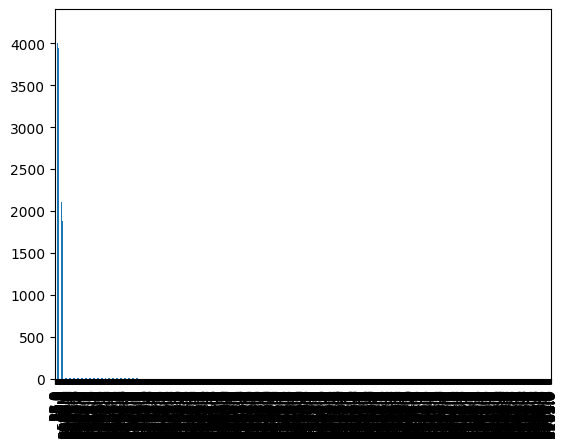

In [4]:
df.Age.value_counts().plot(kind='bar')

In [5]:
# get customer id for nan values in Name Column
customer_IDs = df[(df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)]['Customer_ID'].values

In [6]:
customer_IDs

array(['CUS_0xd40', 'CUS_0x95ee', 'CUS_0x4157', ..., 'CUS_0xf16',
       'CUS_0x8600', nan], dtype=object)

In [7]:
# get real age by customer id
for id in customer_IDs:
    realAge = 0
    try:
        realAge = df.loc[(df['Customer_ID'] == id) & (df['Age'].notna()) & (df['Age'] < 100) & (df['Age'] > 0)]['Age'].values[-1]
    except IndexError:
        continue
    # fill missing value
    df.loc[(df['Customer_ID'] == id) & ((df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)), ['Age']] = realAge

<Axes: >

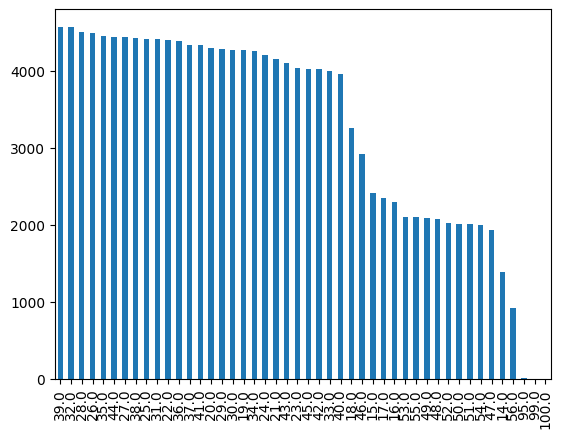

In [20]:
df.Age.value_counts().plot(kind='bar')
# fig = px.bar(df, x="Age")
# fig.show()

In [12]:
df['Annual_Income'].describe()

count    1.500000e+05
mean     1.730552e+05
std      1.404215e+06
min      7.005930e+03
25%      1.945549e+04
50%      3.757861e+04
75%      7.279690e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

<Axes: ylabel='Frequency'>

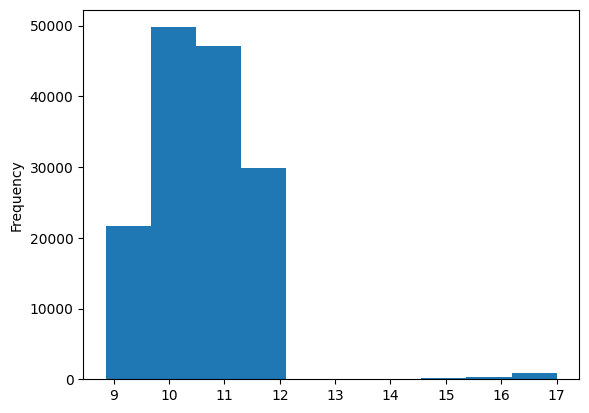

In [21]:
df.Annual_Income.plot(kind='hist')

In [16]:
df['Log_Annual_Income'] = np.log(df.Annual_Income)

C:\Users\20223760\AppData\Local\Temp\ipykernel_13936\493653449.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



<Axes: ylabel='Frequency'>

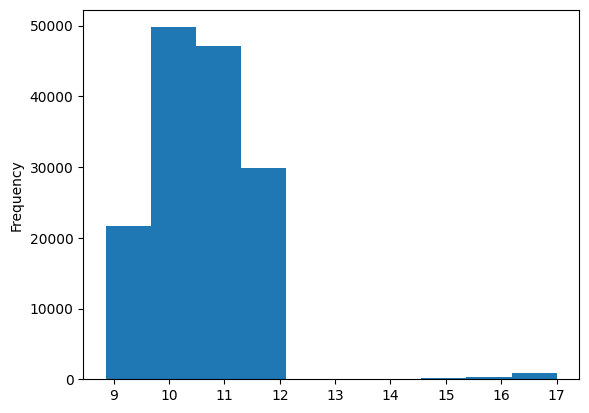

In [22]:
df.Annual_Income.plot(kind='hist')

In [24]:
df["Monthly_Inhand_Salary"].describe()

count    127500.000000
mean       4190.115139
std        3180.489657
min         303.645417
25%        1625.265833
50%        3091.000000
75%        5948.454596
max       15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

<Axes: ylabel='Frequency'>

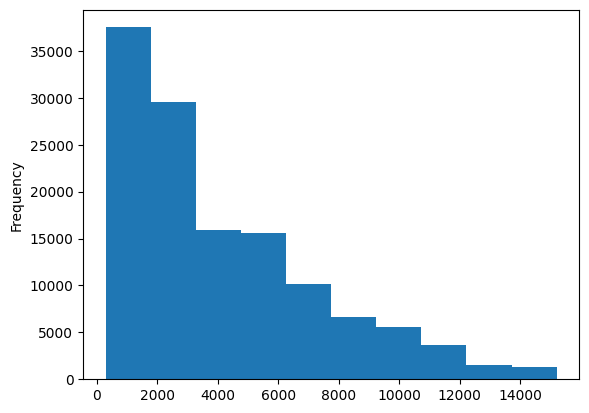

In [25]:
df.Monthly_Inhand_Salary.plot(kind='hist')


In [26]:
df["Num_Bank_Accounts"].describe()

count    150000.000000
mean         17.006940
std         117.069476
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

<Axes: ylabel='Frequency'>

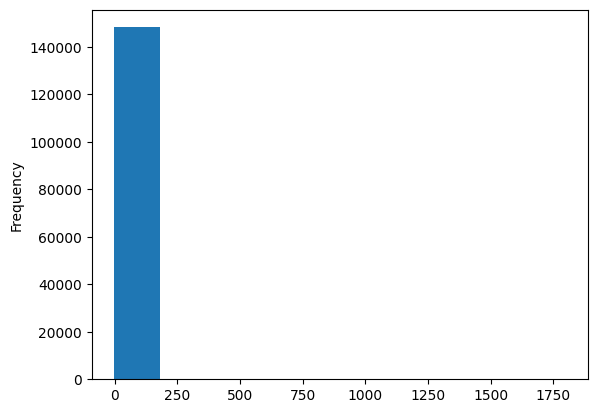

In [27]:
df["Num_Bank_Accounts"].plot(kind="hist")

In [35]:
df[df["Num_Bank_Accounts"] < 0] = 0
df["Num_Bank_Accounts"].describe()

count    150000.000000
mean         17.007187
std         117.069439
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [37]:
df["Log_Num_Bank_Accounts"] = np.log(df["Num_Bank_Accounts"])
df["Log_Num_Bank_Accounts"]

C:\Users\20223760\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning:

divide by zero encountered in log



0         1.098612
1         1.098612
2         1.098612
3         1.098612
4         0.693147
            ...   
149996    1.386294
149997    1.386294
149998    1.386294
149999    1.386294
150000         NaN
Name: Log_Num_Bank_Accounts, Length: 150001, dtype: float64